<a href="https://colab.research.google.com/github/Alyas-01-08/MyCryptocurrency/blob/master/MyCrypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Перечень библиотек

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/content/CryptocurrenciesPrice2015-2021'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/CryptocurrenciesPrice2015-2021/DOGE-USD.csv
/content/CryptocurrenciesPrice2015-2021/ETH-USD.csv
/content/CryptocurrenciesPrice2015-2021/BNB-USD.csv
/content/CryptocurrenciesPrice2015-2021/ADA-USD.csv
/content/CryptocurrenciesPrice2015-2021/BTC-USD.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from xgboost import XGBRegressor

## Создание переменных

In [10]:
df_bitcoin = pd.read_csv('/content/CryptocurrenciesPrice2015-2021/BTC-USD.csv')

In [ ]:
df_bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.0
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.0
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.0
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.0
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.0


In [ ]:
df_bitcoin.shape

(2193, 7)

In [ ]:
missing_values=pd.DataFrame(df_bitcoin.isna().sum().sort_values(ascending=False),columns=['Missing_values'])
missing_values['%']=(missing_values.Missing_values/2193)*100


In [ ]:
missing_values

,Missing_values,%
Volume,4,0.182399
Adj Close,4,0.182399
Close,4,0.182399
Low,4,0.182399
High,4,0.182399
Open,4,0.182399
Date,0,0.000000


In [11]:
df_binancecoin = pd.read_csv('/content/CryptocurrenciesPrice2015-2021/BNB-USD.csv')

In [ ]:
df_binancecoin.shape

(1462, 7)

In [12]:
df_dogecoin = pd.read_csv('/content/CryptocurrenciesPrice2015-2021/DOGE-USD.csv')

In [ ]:
df_dogecoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,0.000127,0.000129,0.000123,0.000126,0.000126,4.088900e+04
1,2015-09-14,0.000125,0.000126,0.000122,0.000125,0.000125,6.118900e+04
2,2015-09-15,0.000125,0.000131,0.000123,0.000126,0.000126,4.333200e+04
3,2015-09-16,0.000126,0.000126,0.000122,0.000124,0.000124,6.032300e+04
4,2015-09-17,0.000124,0.000126,0.000122,0.000125,0.000125,6.051200e+04
...,...,...,...,...,...,...,...
2188,2021-09-09,0.250362,0.259558,0.249270,0.252596,0.252596,1.763184e+09
2189,2021-09-10,0.252585,0.261622,0.235909,0.239982,0.239982,1.840816e+09
2190,2021-09-11,0.239826,0.248018,0.238487,0.241432,0.241432,1.196338e+09
2191,2021-09-12,0.241329,0.254794,0.239233,0.250617,0.250617,1.419289e+09


In [ ]:
missing_values2=pd.DataFrame(df_dogecoin.isna().sum().sort_values(ascending=False),columns=['Missing_values'])
missing_values2['%']=(missing_values.Missing_values/2193)*100

missing_values2

,Missing_values,%
Volume,4,0.182399
Adj Close,4,0.182399
Close,4,0.182399
Low,4,0.182399
High,4,0.182399
Open,4,0.182399
Date,0,0.000000


In [14]:
df_ethereum = pd.read_csv('/content/CryptocurrenciesPrice2015-2021/ETH-USD.csv')

In [ ]:
df_ethereum.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,644138.0
1,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,741085.0
2,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,703390.0
3,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,615593.0
4,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,897940.0


In [ ]:
missing_values3=pd.DataFrame(df_ethereum.isna().sum().sort_values(ascending=False),columns=['Missing_values'])
missing_values3['%']=(missing_values.Missing_values/2193)*100

missing_values3

,Missing_values,%
Volume,4,0.182399
Adj Close,4,0.182399
Close,4,0.182399
Low,4,0.182399
High,4,0.182399
Open,4,0.182399
Date,0,0.000000


In [15]:
df_cardano = pd.read_csv('/content/CryptocurrenciesPrice2015-2021/ADA-USD.csv')

In [ ]:
missing_values4=pd.DataFrame(df_cardano.isna().sum().sort_values(ascending=False),columns=['Missing_values'])
missing_values4['%']=(missing_values.Missing_values/2193)*100

missing_values4

,Missing_values,%
Volume,4,0.182399
Adj Close,4,0.182399
Close,4,0.182399
Low,4,0.182399
High,4,0.182399
Open,4,0.182399
Date,0,0.000000


In [ ]:
for col in df_bitcoin.columns:
    print(type(col))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


## Конвертация колонки Дата в datetime

In [7]:
df_bitcoin['Date']=pd.to_datetime(df_bitcoin['Date'])
df_dogecoin['Date']=pd.to_datetime(df_dogecoin['Date'])
df_ethereum['Date']=pd.to_datetime(df_ethereum['Date'])
df_cardano['Date']=pd.to_datetime(df_cardano['Date'])
df_binancecoin['Date']=pd.to_datetime(df_cardano['Date'])

In [8]:
df_bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.0
1,2015-09-14,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.0
2,2015-09-15,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.0
3,2015-09-16,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.0
4,2015-09-17,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.0


## Тенденция цен закрытий рынка

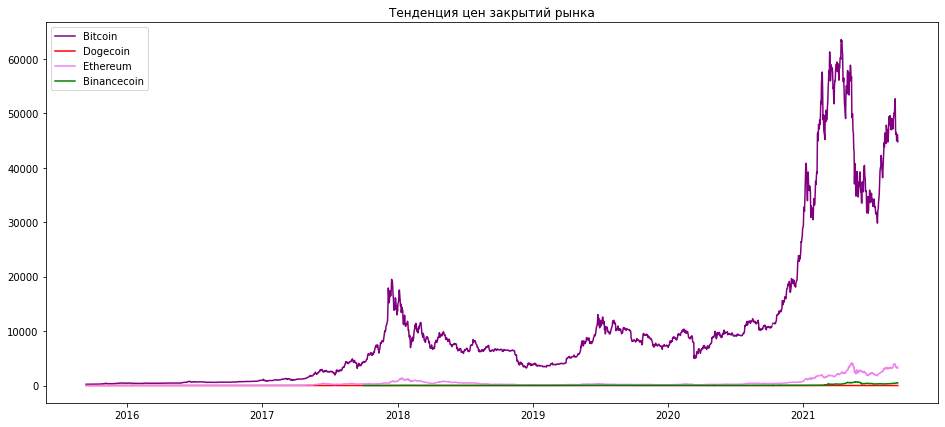

In [ ]:
fig = plt.figure(figsize = (16,7))

plt.plot(df_bitcoin.Date,df_bitcoin.Close,color='purple')
plt.plot(df_dogecoin.Date,df_dogecoin.Close,color='red')
plt.plot(df_ethereum.Date,df_ethereum.Close,color='violet')
# plt.plot(df_cardano.Date,df_cardano.Close,color='yellow')
plt.plot(df_binancecoin.Date,df_binancecoin.Close,color='green')

plt.title('Тенденция цен закрытий рынка')
plt.legend(['Bitcoin','Dogecoin','Ethereum','Binancecoin'])
plt.show()
fig.savefig('/content/fig_all.png')

## Тенденция объемов криптоволют

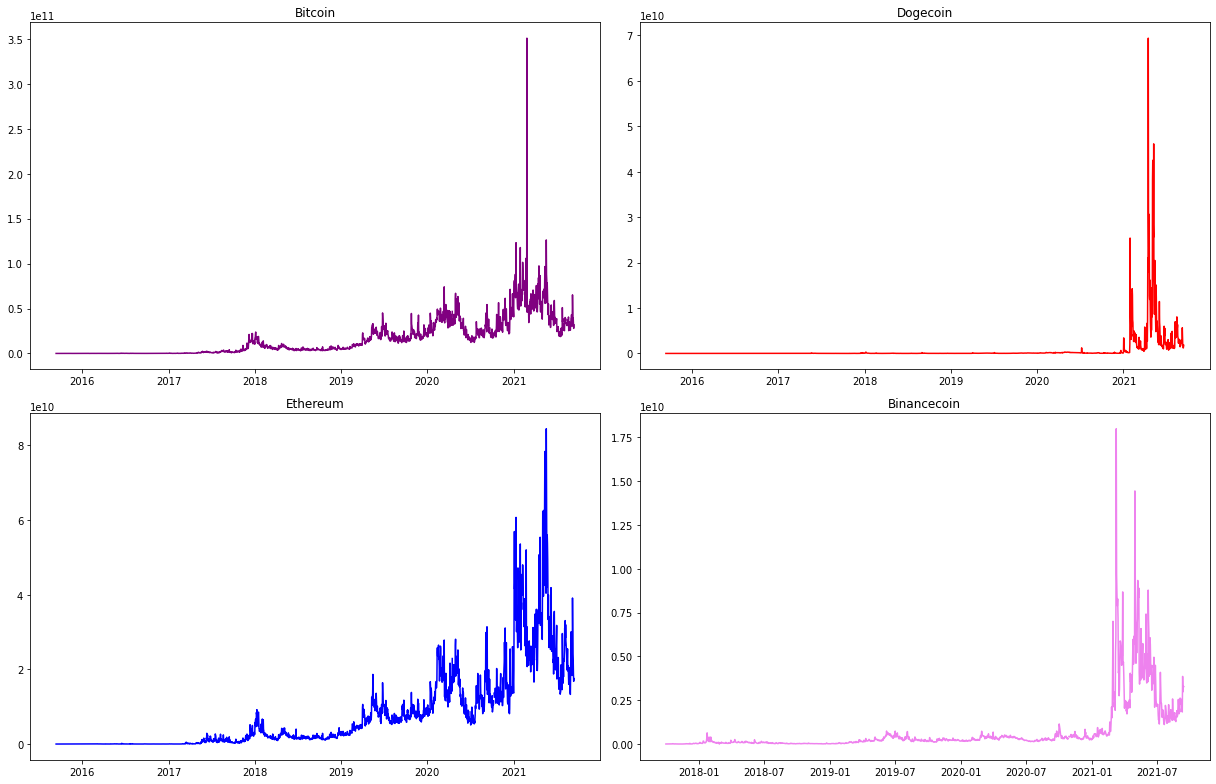

In [ ]:
fig = plt.figure(figsize = (17,11))

plt.subplot(2,2,1)
plt.plot(df_bitcoin.Date,df_bitcoin.Volume,color='purple')
plt.title('Bitcoin')


plt.subplot(2,2,2)
plt.plot(df_dogecoin.Date,df_dogecoin.Volume,color='red')
plt.title('Dogecoin')

plt.subplot(2,2,3)

plt.plot(df_ethereum.Date,df_ethereum.Volume,color='blue')
plt.title('Ethereum')


plt.subplot(2,2,4)

plt.plot(df_binancecoin.Date,df_binancecoin.Volume,color='violet')
plt.title('Binancecoin')

fig.tight_layout()
fig.savefig('/content/fig_volume_all.png')

## Анализ закрытий рынка за последние 2 года

In [ ]:
two_year_bitcoin=df_bitcoin[df_bitcoin.Date>'2019-09']
two_year_dogecoin=dogecoin=df_dogecoin[df_dogecoin.Date>'2019-09']
two_year_ethereum=df_ethereum[df_ethereum.Date>'2019-09']
two_year_binancecoin=df_binancecoin[df_binancecoin.Date>'2019-09']

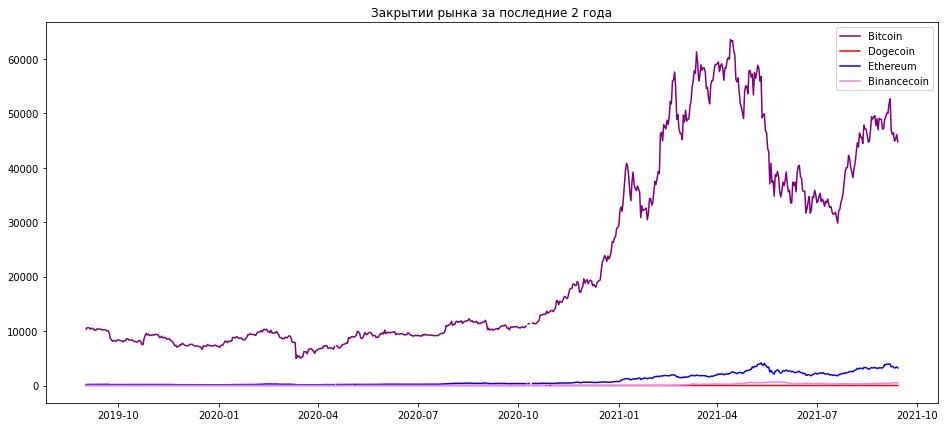

In [ ]:
fig = plt.figure(figsize = (16,7))

plt.plot(two_year_bitcoin.Date,two_year_bitcoin.Close,color='purple')
plt.plot(two_year_dogecoin.Date,two_year_dogecoin.Close,color='red')
plt.plot(two_year_ethereum.Date,two_year_ethereum.Close,color='blue')
plt.plot(two_year_binancecoin.Date,two_year_binancecoin.Close,color='violet')
plt.title('Закрытии рынка за последние 2 года')
plt.legend(['Bitcoin','Dogecoin','Ethereum','Binancecoin'])
plt.show()
fig.savefig('/content/fig_all_short.png')

## Тенденция объемов за последние 2 года

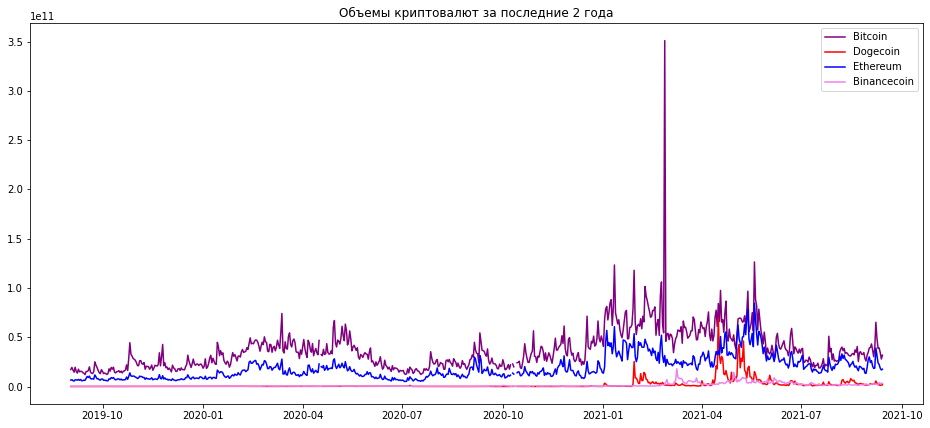

In [ ]:
fig = plt.figure(figsize = (16,7))

plt.plot(two_year_bitcoin.Date,two_year_bitcoin.Volume,color='purple')
plt.plot(two_year_dogecoin.Date,two_year_dogecoin.Volume,color='red')
plt.plot(two_year_ethereum.Date,two_year_ethereum.Volume,color='blue')
plt.plot(two_year_binancecoin.Date,two_year_binancecoin.Volume,color='violet')

plt.title('Объемы криптовалют за последние 2 года')
plt.legend(['Bitcoin','Dogecoin','Ethereum','Binancecoin'])
plt.show()
fig.savefig('/content/fig_volume_all_short.png')

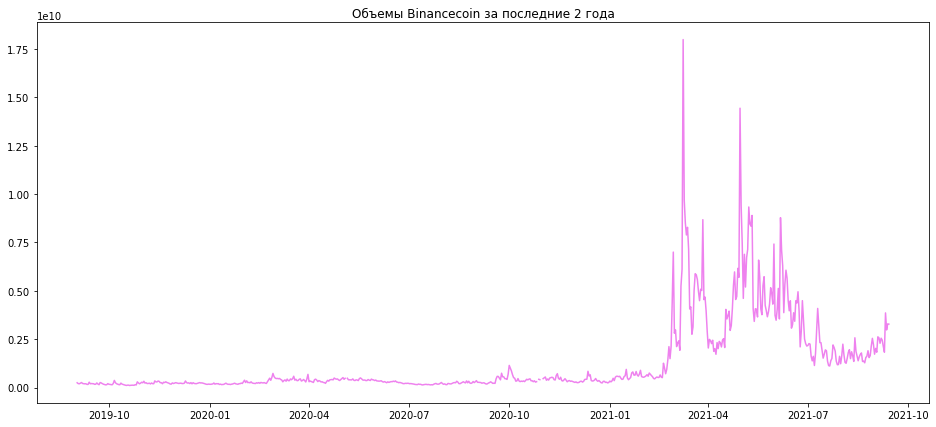

In [ ]:
fig = plt.figure(figsize = (16,7))

# plt.plot(two_year_bitcoin.Date,two_year_bitcoin.Volume,color='purple')
# plt.plot(two_year_dogecoin.Date,two_year_dogecoin.Volume,color='red')
# plt.plot(two_year_ethereum.Date,two_year_ethereum.Volume,color='blue')
plt.plot(two_year_binancecoin.Date,two_year_binancecoin.Volume,color='violet')

plt.title('Объемы Binancecoin за последние 2 года')
# plt.legend(['Bitcoin','Dogecoin','Ethereum','Binancecoin'])
plt.show()
fig.savefig('/content/fig_bnb_volume.png')

## Разница цен при открытий и закрытий рынка

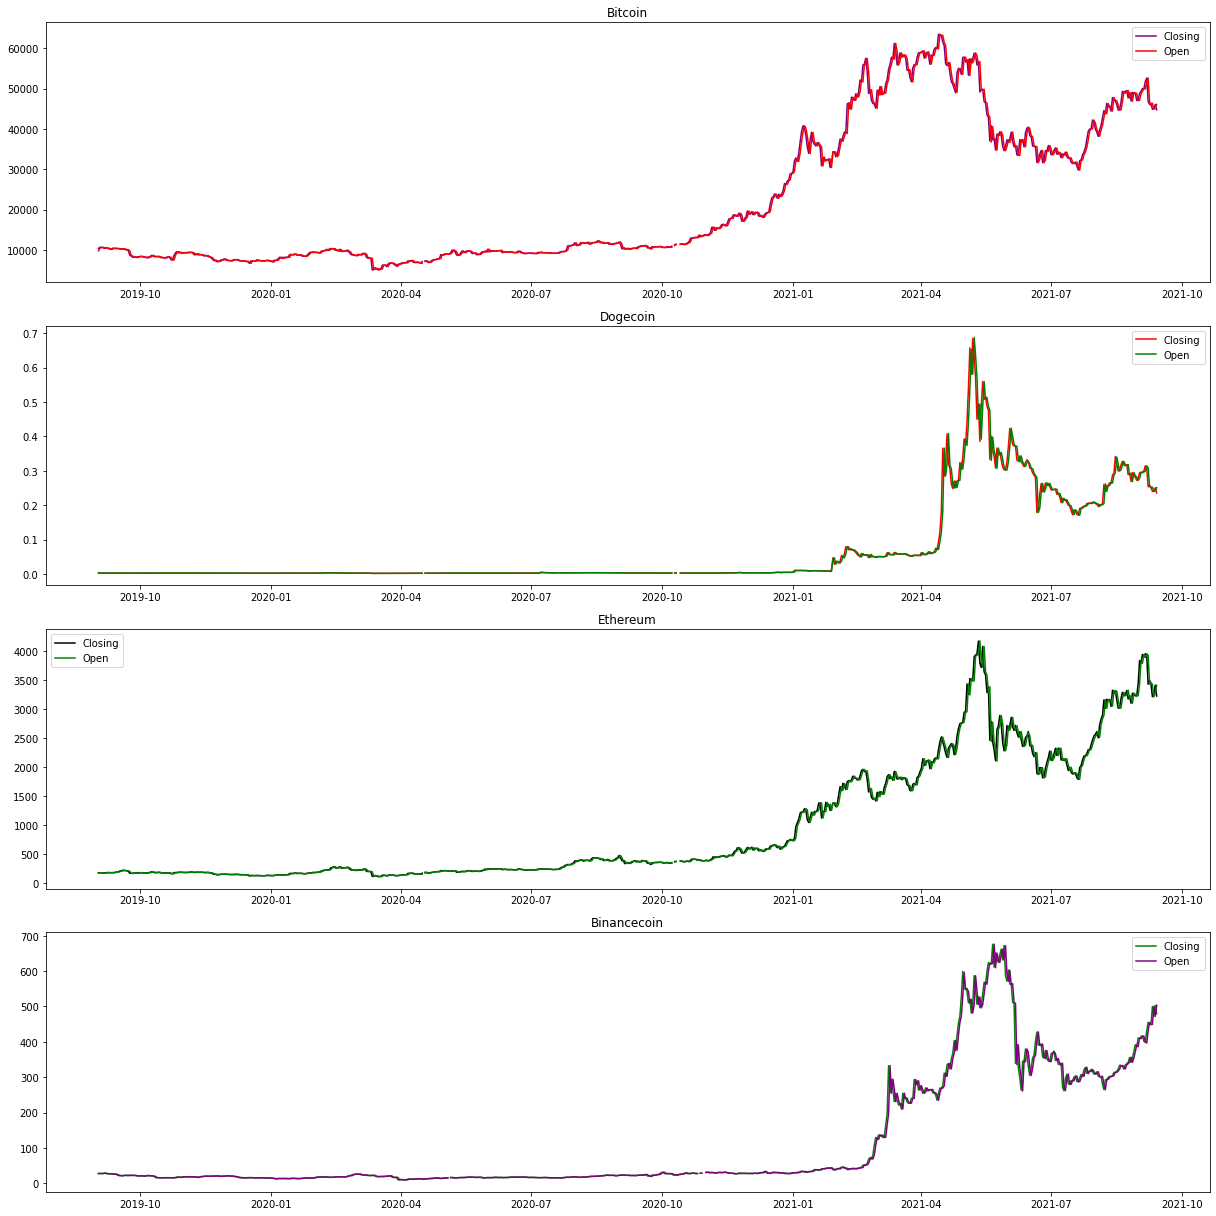

In [ ]:
fig = plt.figure(figsize = (17,17))

plt.subplot(4, 1, 1)
plt.plot(two_year_bitcoin.Date,two_year_bitcoin['Close'],color='purple')
plt.plot(two_year_bitcoin.Date,two_year_bitcoin['Open'],color='red')
plt.legend(['Closing','Open'])
plt.title('Bitcoin')

plt.subplot(4, 1, 2)
plt.plot(two_year_dogecoin.Date,two_year_dogecoin['Close'],color='red')
plt.plot(two_year_dogecoin.Date,two_year_dogecoin['Open'],color='green')
plt.legend(['Closing','Open'])
plt.title('Dogecoin')

plt.subplot(4, 1, 3)
plt.plot(two_year_ethereum.Date,two_year_ethereum['Close'],color='black')
plt.plot(two_year_ethereum.Date,two_year_ethereum['Open'],color='green')
plt.legend(['Closing','Open'])
plt.title('Ethereum')

plt.subplot(4, 1, 4)
plt.plot(two_year_binancecoin.Date,two_year_binancecoin['Close'],color='green')
plt.plot(two_year_binancecoin.Date,two_year_binancecoin['Open'],color='purple')
plt.legend(['Closing','Open'])
plt.title('Binancecoin')


fig.tight_layout()

## Очищение данных

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
final_df=df_bitcoin[['Date','Close']]
final_df=final_df[final_df.Date>'2020-09']
final_df.head()

,Date,Close
1816,2020-09-02,11414.034180
1817,2020-09-03,10245.296875
1818,2020-09-04,10511.813477
1819,2020-09-05,10169.567383
1820,2020-09-06,10280.351563


Оставляем только колонку Close

In [ ]:
final_df=final_df.set_index('Date')

In [ ]:
data=final_df.filter(['Close'])
data.head()

,Close
Date,
2020-09-02,11414.034180
2020-09-03,10245.296875
2020-09-04,10511.813477
2020-09-05,10169.567383
2020-09-06,10280.351563


In [ ]:
data.isna().sum()

Close    3
dtype: int64

In [ ]:
data=data.dropna(subset=['Close'])
data.shape

(374, 1)

In [ ]:
dataset=data.values # Массив со значениями колонки Close


In [ ]:
training_data_len=int(np.ceil(len(dataset)*0.8)) # 300

In [ ]:
#Маштобирование данных

mms=MinMaxScaler(feature_range=(0,1))
scaled_data=mms.fit_transform(dataset)


## Создание набора данных для обучения

In [ ]:
train_data=scaled_data[0:training_data_len ,:]
len(train_data)

300

In [ ]:
X_train=[]
y_train=[]

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])


In [ ]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(240, 60, 1)

## Модель LSTM 

In [ ]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

240/240 [==============================] - 10s 32ms/step - loss: 0.0141


## Обучение моделя

In [ ]:
test_data=scaled_data[training_data_len-60:621:,:]

X_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [ ]:
X_test=np.array(X_test)

In [ ]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(74, 60, 1)

## Прогноз цен 

In [ ]:
predictions=model.predict(X_test)
predictions=mms.inverse_transform(predictions)

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

In [ ]:
train

,Close
Date,
2020-09-02,11414.034180
2020-09-03,10245.296875
2020-09-04,10511.813477
2020-09-05,10169.567383
2020-09-06,10280.351563
...,...
2021-06-27,34649.644531
2021-06-28,34434.335938
2021-06-29,35867.777344


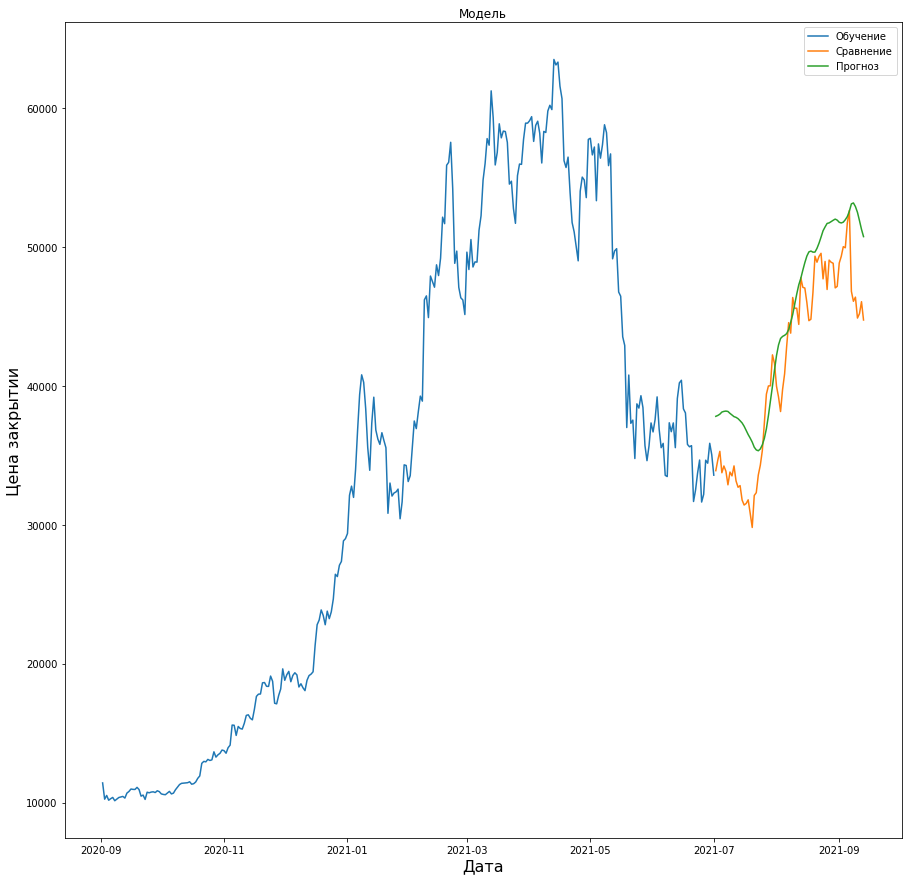

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Модель')

plt.xlabel('Дата',fontsize=16)
plt.ylabel('Цена закрытии',fontsize=16)

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

plt.legend(['Обучение','Сравнение','Прогноз'])
plt.show()

## Ссылка на телеграм бота:

**Название бота:** MyCryptocurrencyBOT

**Имя пользователя:** @myCryptocurrency123_bot